In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
warnings.filterwarnings('ignore')

In [9]:
!pip install sidetable

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = "/content/drive/MyDrive/hotel_booking_cleaned-data.csv"
df = pd.read_csv(file_path)


### Importing our clean Data

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0


### Checking the Data

In [13]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
adults,0
meal,0
country,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   meal                            118985 non-null  object 
 9   country                         118985 non-null  object 
 10  market_segment                  118985 non-null  object 
 11  distribution_channel            118985 non-null  object 
 12  is_repeated_gues

### Descriptive Statistics

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,stays,guests,kids
count,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000
mean,0.370753,104.070353,2016.156356,27.164407,15.796781,1.862689,0.031542,0.087339,0.137328,0.218507,2.325604,101.964460,0.062655,0.570652,6.552381,3.425961,1.971072,0.108383
std,0.483008,106.891161,0.707743,13.598771,8.781164,0.570064,0.174777,0.845700,1.499529,0.638068,17.614343,48.053329,0.245546,0.792403,3.089348,2.541649,0.719446,0.404480
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,7.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,12.000000,69.000000,55.000000,10.000000


In [16]:
df.describe(include = 'O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,arrival_date,arrival_day,month_year
count,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985
unique,2,12,4,177,8,5,9,11,3,4,3,926,793,7,26
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,2015-12-05,Friday,2017-05
freq,78939,13829,92018,48917,56221,97559,85861,73982,104237,89336,74871,1460,448,19556,6297


## Univariate Analysis


### Hotel

In [17]:
df.stb.freq(['hotel'], cum_cols=False)

,hotel,count,percent
0,City Hotel,78939,66.343657
1,Resort Hotel,40046,33.656343


Text(0, 0.5, 'Count')

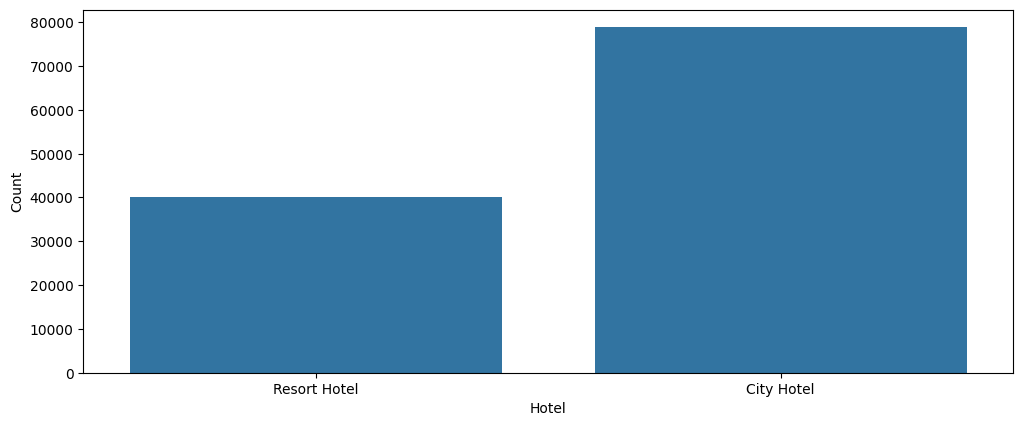

In [18]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='hotel')
plt.xlabel('Hotel')
plt.ylabel('Count')

### Cancellation

In [19]:
df.stb.freq(['is_canceled'], cum_cols = False)

# The cancellation rate is almost similar to the industry standard around 37 % - 40 % from the given source, this is
# the problem that hospitality industy is facing because there are almost 4 cancellation in every 10 bookings

,is_canceled,count,percent
0,0,74871,62.924738
1,1,44114,37.075262


Text(0, 0.5, 'Count')

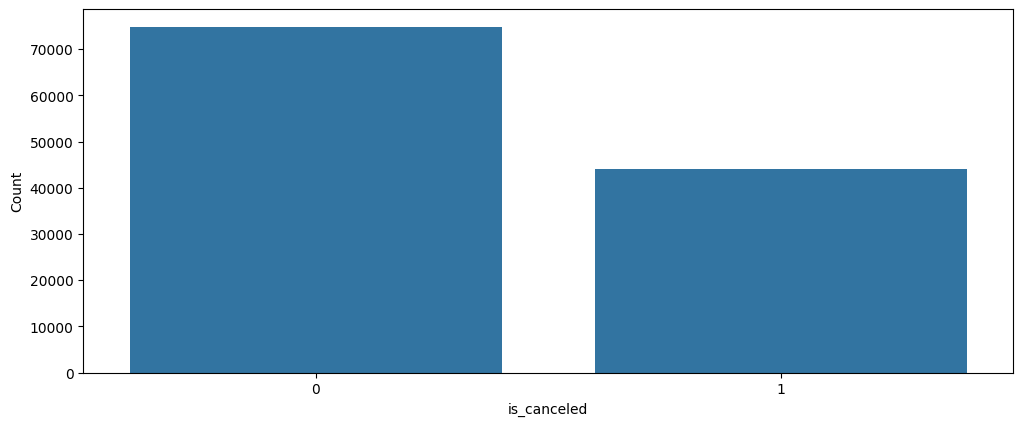

In [20]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='is_canceled')
plt.xlabel('is_canceled')
plt.ylabel('Count')

### Arrival Date Month

In [21]:
df.stb.freq(['arrival_date_month'], cum_cols = False)

# We can see that booking for August and July has the higest percentage among all the other months, while booking
# for December and January has the lowest percentage

,arrival_date_month,count,percent
0,August,13829,11.622473
1,July,12611,10.598815
2,May,11764,9.886961
3,October,11131,9.354961
4,April,11057,9.292768
5,June,10917,9.175106
6,September,10489,8.815397
7,March,9749,8.193470
8,February,8034,6.752112
9,November,6765,5.685591


Text(0, 0.5, 'Count')

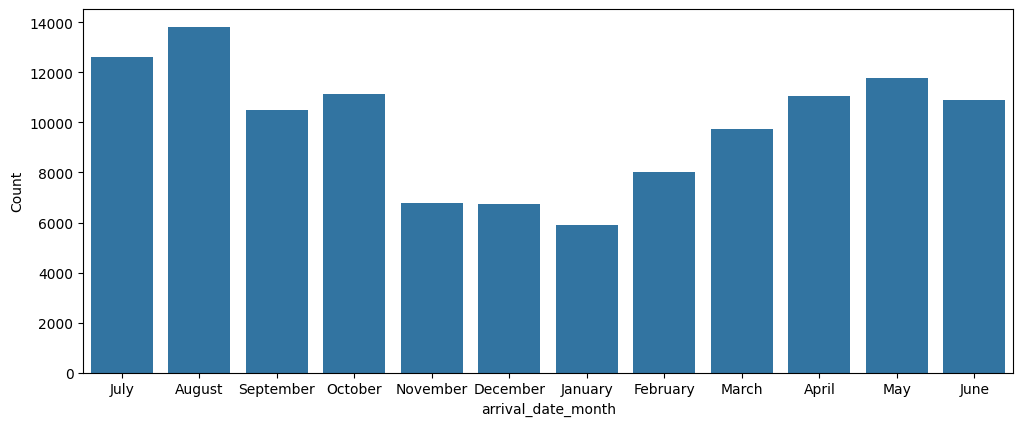

In [22]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='arrival_date_month')
plt.xlabel('arrival_date_month')
plt.ylabel('Count')

### Lead Time


In [23]:
df.stb.freq(['lead_time'], cum_cols = False)

,lead_time,count,percent
0,0,6258,5.259486
1,1,3441,2.891961
2,2,2065,1.735513
3,3,1812,1.522881
4,4,1710,1.437156
...,...,...,...
474,400,1,0.000840
475,387,1,0.000840
476,380,1,0.000840
477,371,1,0.000840


In [24]:
df['lead_time_month'] = df['lead_time'] // 30

# Since there are many unique values in the lead time we will group it into months.

In [25]:
df.stb.freq(['lead_time_month'], cum_cols = False)

,lead_time_month,count,percent
0,0,37879,31.835105
1,1,17140,14.405177
2,2,12697,10.671093
3,3,10453,8.785141
4,4,8046,6.762197
5,5,7891,6.631928
6,6,5699,4.789679
7,7,4354,3.659285
8,9,3441,2.891961
9,8,3420,2.874312


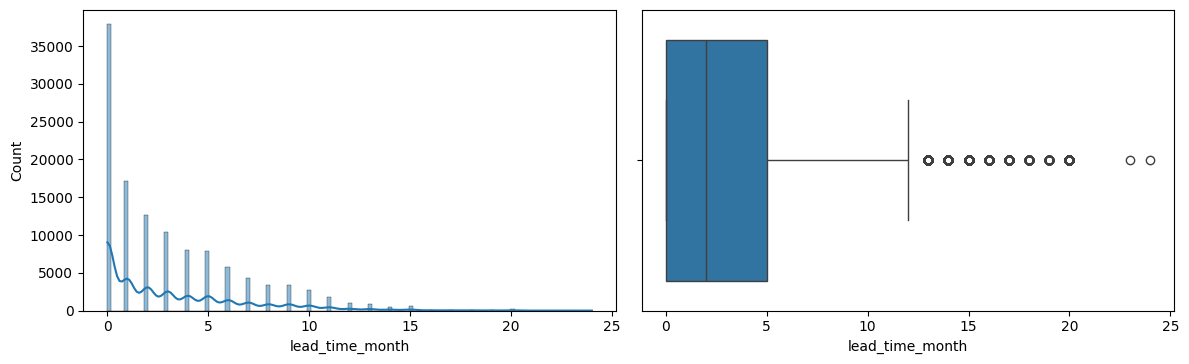

In [26]:
plt.figure(figsize=(12, 50))

# Histogram for 'lead_time_month'
plt.subplot(14, 2, 1)
sns.histplot(df['lead_time_month'], kde=True)

# Boxplot for 'lead_time_month'
plt.subplot(14, 2, 2)
sns.boxplot(x=df['lead_time_month'])

plt.tight_layout()
plt.show()


### Meal type

In [27]:
df.stb.freq(['meal'], cum_cols=False)

# BB(bed and breakfast) is the most popular meal package.
# FB(full board) is the least popular meal package(included breakfast, lunch , dinner).

,meal,count,percent
0,BB,92018,77.335799
1,HB,14454,12.147750
2,SC,11715,9.845779
3,FB,798,0.670673


Text(0, 0.5, 'Count')

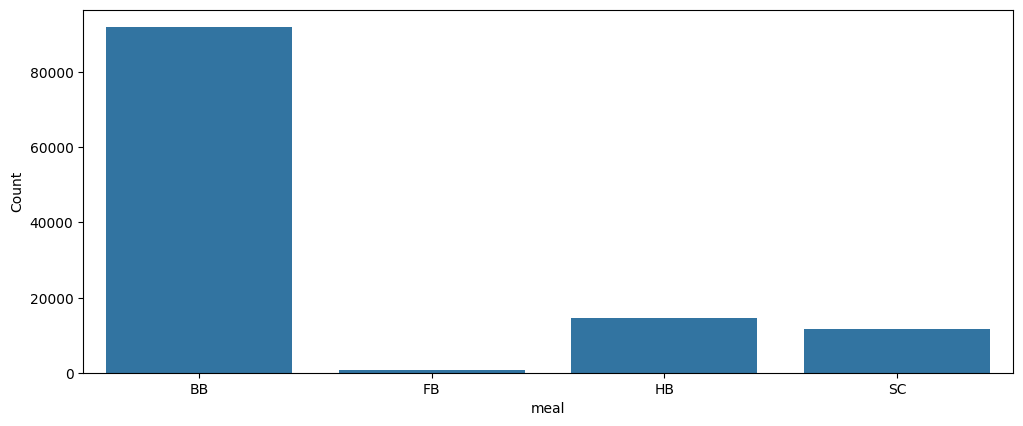

In [28]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='meal')
plt.xlabel('meal')
plt.ylabel('Count')

### Country

In [29]:
df.stb.freq(['country'], cum_cols = False).head(15)

,country,count,percent
0,PRT,48917,41.111905
1,GBR,12104,10.172711
2,FRA,10376,8.720427
3,ESP,8546,7.182418
4,DEU,7271,6.110854
5,ITA,3752,3.153339
6,IRL,3370,2.832290
7,BEL,2326,1.954868
8,BRA,2212,1.859058
9,NLD,2094,1.759886


In [30]:
def country(location):
    if (location['country'] == 'PRT'):
        return 'Portugal'
    else:
        return 'Non_Portugal'

df['booking_country'] = df.apply(country, axis = 1)

# Almost half of the bookings were made from portugal,since there are so many unique values from all the countries.
# we are grouping it into booking from portugal and booking from Non_portugal

In [31]:
df.stb.freq(['booking_country'], cum_cols=False)

,booking_country,count,percent
0,Non_Portugal,70068,58.888095
1,Portugal,48917,41.111905


Text(0, 0.5, 'Count')

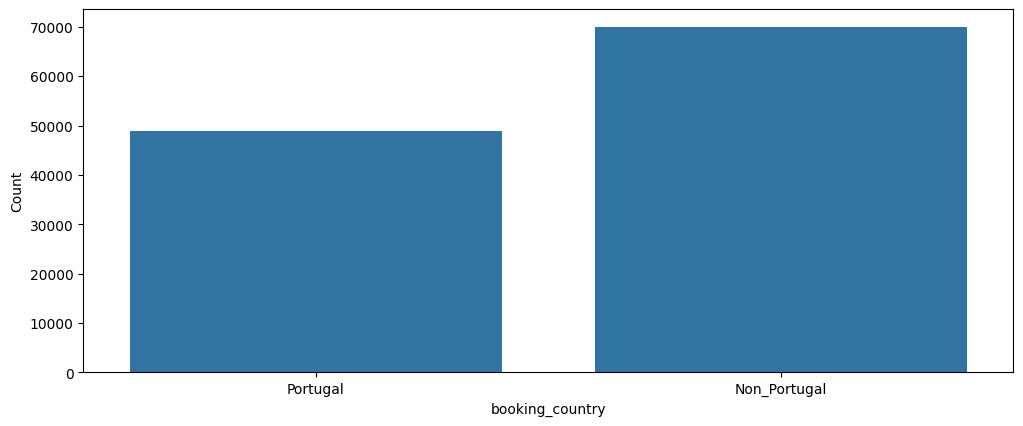

In [32]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='booking_country')
plt.xlabel('booking_country')
plt.ylabel('Count')

### Market Segment

In [33]:
df.stb.freq(['market_segment'], cum_cols = False)

# Here we can see travel agent (online and offline) market segment dominating the booking, compared to others
# there are a couple of undefined values as well, we will replace it with mode here in this case it is 'Online TA'

,market_segment,count,percent
0,Online TA,56221,47.250494
1,Offline TA/TO,24178,20.320208
2,Groups,19790,16.632349
3,Direct,12553,10.550069
4,Corporate,5282,4.439215
5,Complementary,724,0.608480
6,Aviation,235,0.197504
7,Undefined,2,0.001681


In [34]:
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')

df.stb.freq(['market_segment'], cum_cols = False)

,market_segment,count,percent
0,Online TA,56223,47.252175
1,Offline TA/TO,24178,20.320208
2,Groups,19790,16.632349
3,Direct,12553,10.550069
4,Corporate,5282,4.439215
5,Complementary,724,0.608480
6,Aviation,235,0.197504


Text(0, 0.5, 'Count')

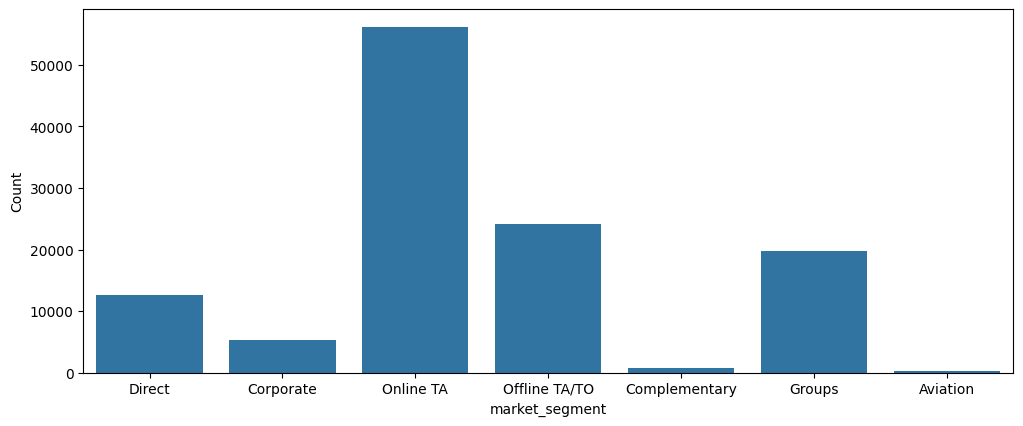

In [35]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='market_segment')
plt.xlabel('market_segment')
plt.ylabel('Count')

### Distribution Channel


In [36]:
df.stb.freq(['distribution_channel'], cum_cols = False)

# Here we can see TA/TO distribution channel dominating the booking, compared to others
# there are a couple of undefined values as well, we will replace it with mode here in this case it is 'TA/TO'

,distribution_channel,count,percent
0,TA/TO,97559,81.992688
1,Direct,14577,12.251124
2,Corporate,6651,5.589780
3,GDS,193,0.162205
4,Undefined,5,0.004202


In [37]:
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'TA/TO')

df.stb.freq(['distribution_channel'], cum_cols = False)

,distribution_channel,count,percent
0,TA/TO,97564,81.996890
1,Direct,14577,12.251124
2,Corporate,6651,5.589780
3,GDS,193,0.162205


Text(0, 0.5, 'Count')

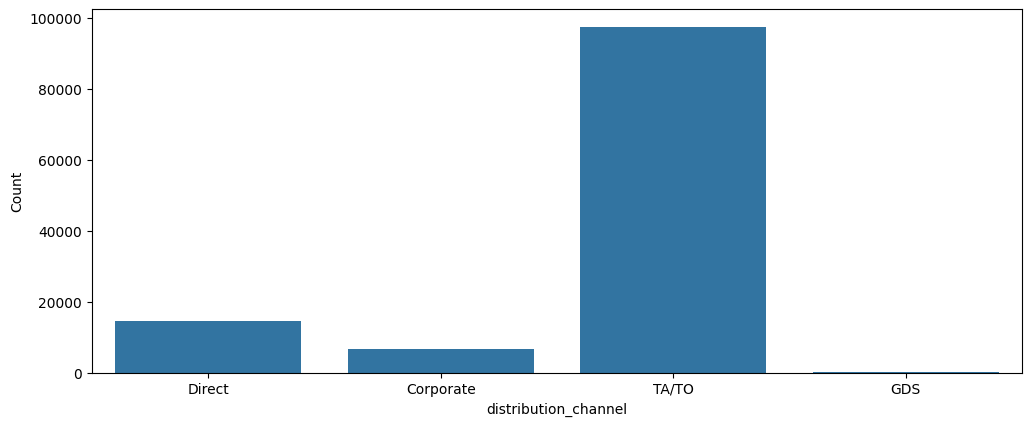

In [38]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='distribution_channel')
plt.xlabel('distribution_channel')
plt.ylabel('Count')

### Repeated Guest


In [39]:
df.stb.freq(['is_repeated_guest'], cum_cols = False)

# From the below table we can see that there are only 3.1 % of repeated guest, this might be one of the reason
# for hotel cancellation, because loyal customers are not repeating the booking

,is_repeated_guest,count,percent
0,0,115232,96.845821
1,1,3753,3.154179


Text(0, 0.5, 'Count')

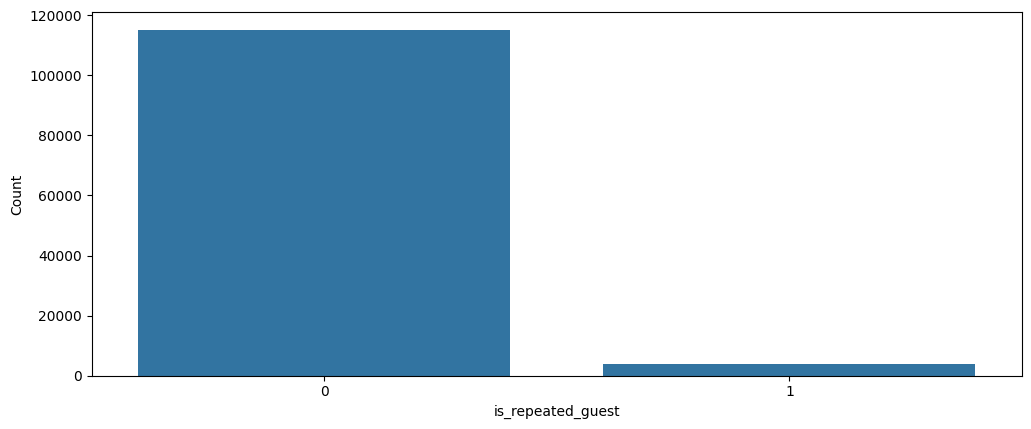

In [40]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='is_repeated_guest')
plt.xlabel('is_repeated_guest')
plt.ylabel('Count')


### Previous Cancellation


In [41]:
df.stb.freq(['previous_cancellations'], cum_cols = False)

,previous_cancellations,count,percent
0,0,112508,94.556457
1,1,6046,5.081313
2,2,114,0.095810
3,3,65,0.054629
4,24,48,0.040341
5,11,35,0.029415
6,4,31,0.026054
7,26,26,0.021851
8,25,25,0.021011
9,6,22,0.018490


In [42]:
def cancellation(cancel):
    if (cancel['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)

# Almost 95% of the booking has never been cancelled before in the data, so we are grouping this into booking
# that never cancelled as 0 and booking have been cancelled as 1.

In [43]:
df.stb.freq(['is_previously_cancelled'], cum_cols = False)

,is_previously_cancelled,count,percent
0,0,112508,94.556457
1,1,6477,5.443543


Text(0, 0.5, 'Count')

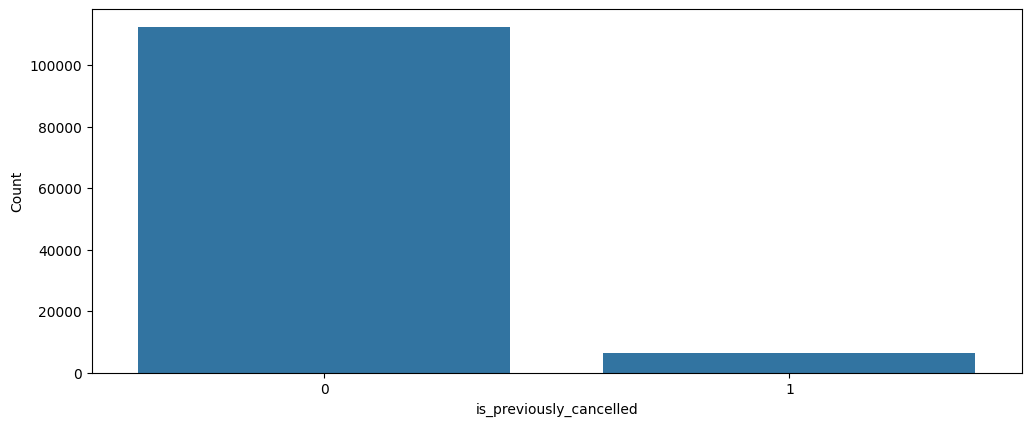

In [44]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='is_previously_cancelled')
plt.xlabel('is_previously_cancelled')
plt.ylabel('Count')

### Reserved Room Type

In [45]:
df.stb.freq(['reserved_room_type'], cum_cols = False)

# We can saw that room A is the most popular room in the bookings with more tha 70% , let's assume that
# room A might be the cheapest or affordable room while compared to the other rooms.

,reserved_room_type,count,percent
0,A,85861,72.161197
1,D,19178,16.117998
2,E,6518,5.478001
3,F,2892,2.430558
4,G,2091,1.757364
5,C,931,0.782452
6,B,907,0.762281
7,H,601,0.505106
8,L,6,0.005043


Text(0, 0.5, 'Count')

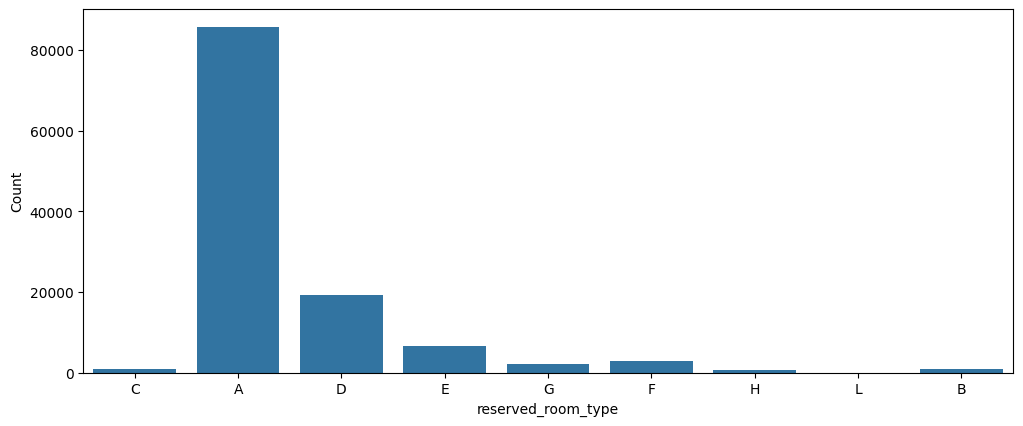

In [46]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='reserved_room_type')
plt.xlabel('reserved_room_type')
plt.ylabel('Count')

### Booking Changes


In [47]:
df.stb.freq(['booking_changes'], cum_cols = False)

,booking_changes,count,percent
0,0,101066,84.940119
1,1,12620,10.606379
2,2,3773,3.170988
3,3,910,0.764802
4,4,367,0.308442
5,5,114,0.095810
6,6,61,0.051267
7,7,28,0.023532
8,8,14,0.011766
9,9,8,0.006724


In [48]:
def booking_changes(change):
    if (change['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(booking_changes, axis = 1)

# Close too 85% of the customers never change their bookings, since there are many values in booking changes column
# we are grouping it in to booking not changed as 0 and rest of the booking changes as 1.

In [49]:
df.stb.freq(['is_booking_changes'], cum_cols = False)

,is_booking_changes,count,percent
0,0,101066,84.940119
1,1,17919,15.059881


Text(0, 0.5, 'Count')

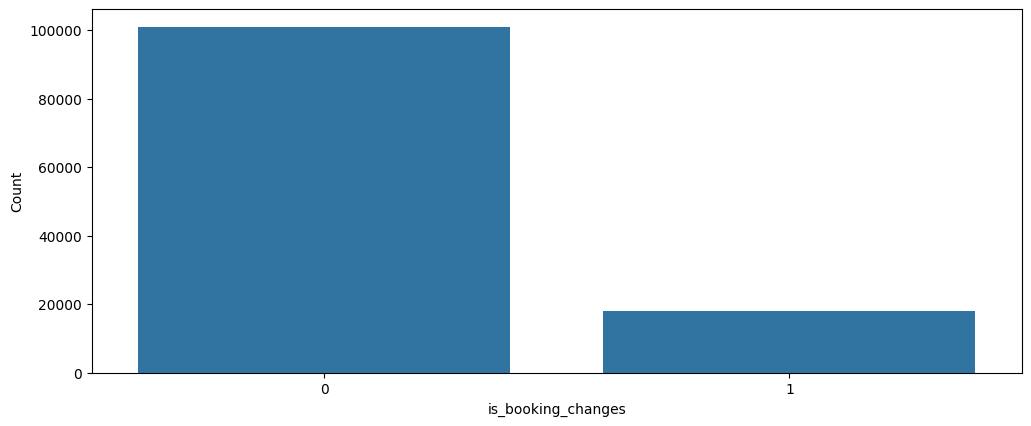

In [50]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='is_booking_changes')
plt.xlabel('is_booking_changes')
plt.ylabel('Count')

### Deposit Type


In [51]:
df.stb.freq(['deposit_type'], cum_cols = False)

# Here No deposit type is the most popular compared to other deposit type in this booking in portugal, this might be
# one of the reason why the cancellation is very high, because customer have that flexibility for cancellation because
# of no pre- deposit amount.

,deposit_type,count,percent
0,No Deposit,104237,87.605160
1,Non Refund,14586,12.258688
2,Refundable,162,0.136152


Text(0, 0.5, 'Count')

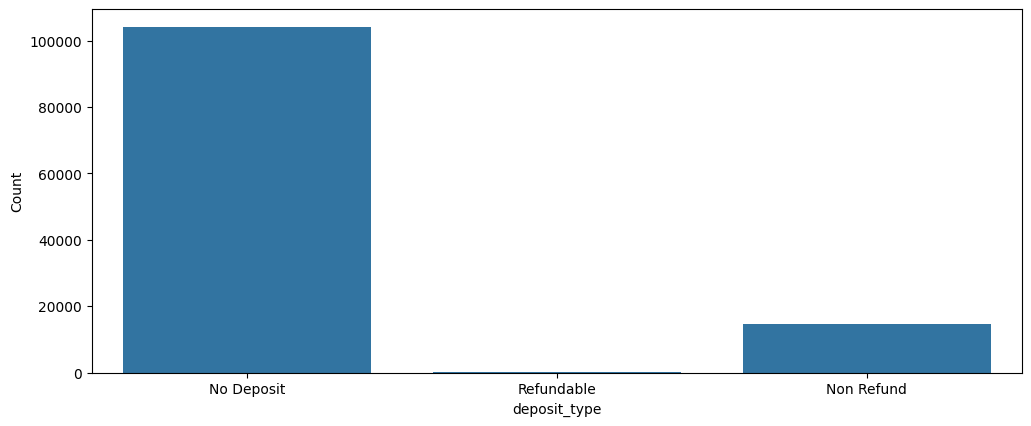

In [52]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='deposit_type')
plt.xlabel('deposit_type')
plt.ylabel('Count')

### Customer Type


In [53]:
df.stb.freq(['customer_type'], cum_cols = False)

# Most of the booking customers here are transient i,e individual booking who dosen't related to any
# company or organization.

,customer_type,count,percent
0,Transient,89336,75.081733
1,Transient-Party,25005,21.015254
2,Contract,4071,3.421440
3,Group,573,0.481573


Text(0, 0.5, 'Count')

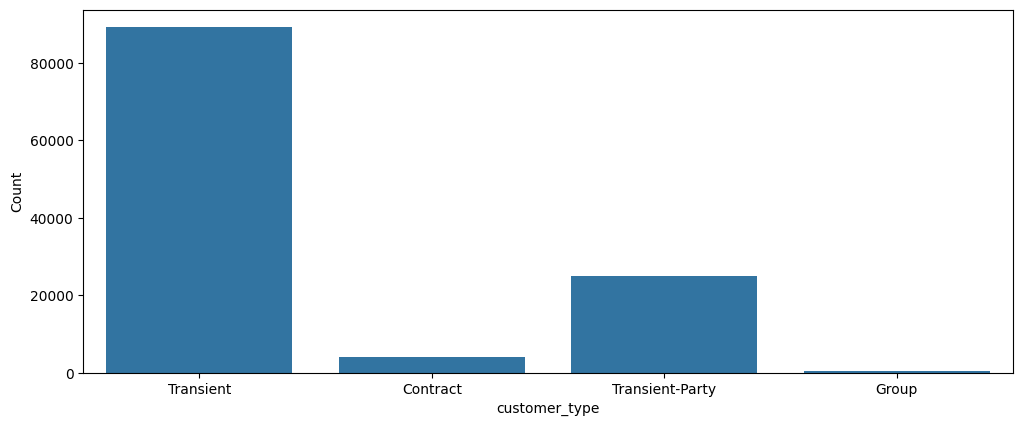

In [54]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='customer_type')
plt.xlabel('customer_type')
plt.ylabel('Count')

### ADR

In [55]:
df.stb.freq(['adr'], cum_cols = False).head(10)

,adr,count,percent
0,62.0,3754,3.155020
1,75.0,2714,2.280960
2,90.0,2472,2.077573
3,65.0,2418,2.032189
4,80.0,1889,1.587595
5,0.0,1804,1.516157
6,95.0,1661,1.395974
7,120.0,1606,1.349750
8,100.0,1573,1.322015
9,85.0,1538,1.292600


In [56]:
fig = px.histogram(df, x="adr",title = 'ADR Distribution')
fig.show()

# From the below histogram below we can see that the highest frequency of adr is around 61.5 - 62.49

### Parking Space

In [57]:
df.stb.freq(['required_car_parking_spaces'], cum_cols = False)

,required_car_parking_spaces,count,percent
0,0,111578,93.774846
1,1,7374,6.197420
2,2,28,0.023532
3,3,3,0.002521
4,8,2,0.001681


In [58]:
def parking(park):
    if (park['required_car_parking_spaces'] < 1):
        return 0
    else :
        return 1

df['parking_space'] = df.apply(parking, axis = 1)

# Here we can simply segment these into 2 booking that dosen't require parking space as 0 and booking that
# require parking as 1 from here only 6.2 percent of the booking  has a need of parking.

In [59]:
df.stb.freq(['parking_space'], cum_cols = False)

,parking_space,count,percent
0,0,111578,93.774846
1,1,7407,6.225154


Text(0, 0.5, 'Count')

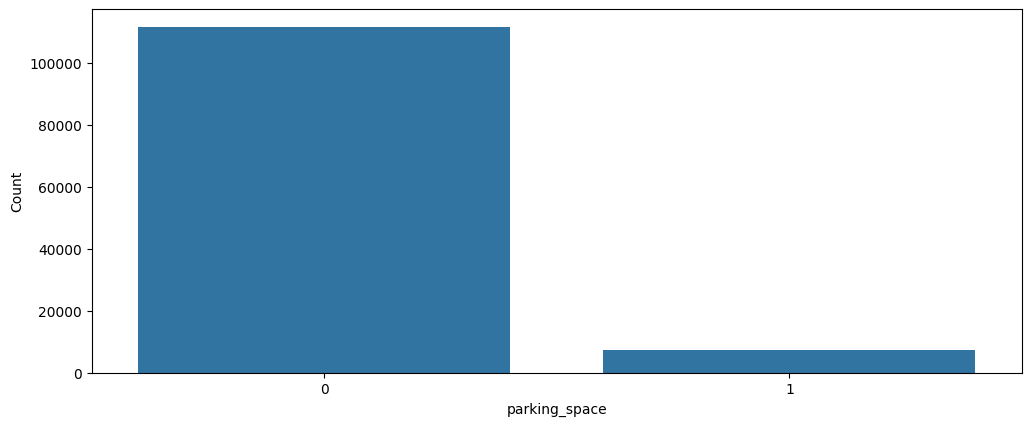

In [60]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='parking_space')
plt.xlabel('parking_space')
plt.ylabel('Count')


### Special Requests


In [61]:
df.stb.freq(['total_of_special_requests'], cum_cols = False)

# More than 50% of the customers don't have any special request when they book.

,total_of_special_requests,count,percent
0,0,70131,58.941043
1,1,33085,27.806026
2,2,12911,10.850948
3,3,2480,2.084296
4,4,338,0.284069
5,5,40,0.033618


Text(0, 0.5, 'Count')

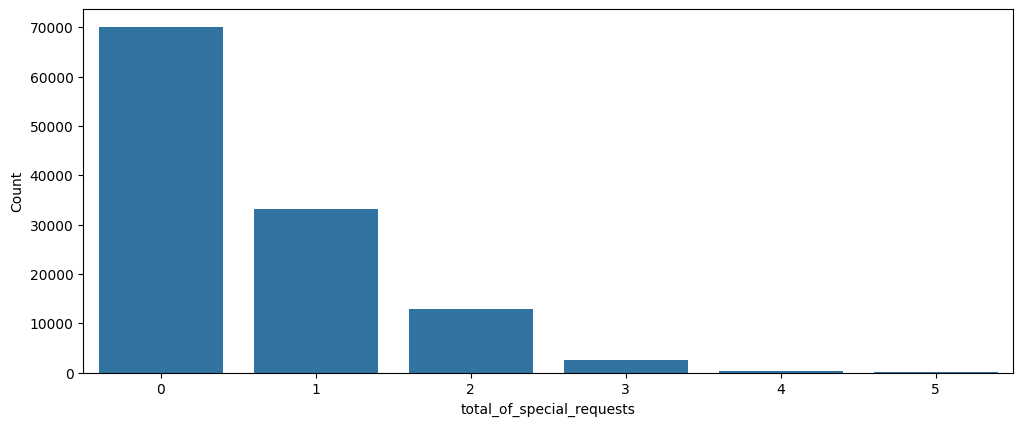

In [62]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='total_of_special_requests')
plt.xlabel('total_of_special_requests')
plt.ylabel('Count')




### Arrival Day


In [63]:
df.stb.freq(['arrival_day'], cum_cols = False)

# We can see that booking for Friday and Thursday has the higest percentage among all the other days, while booking
# for Sunday and Tuesday has the lowest percentage

,arrival_day,count,percent
0,Friday,19556,16.435685
1,Thursday,19187,16.125562
2,Monday,18127,15.234693
3,Saturday,18002,15.129638
4,Wednesday,16074,13.509266
5,Sunday,14090,11.841829
6,Tuesday,13949,11.723326


Text(0, 0.5, 'Count')

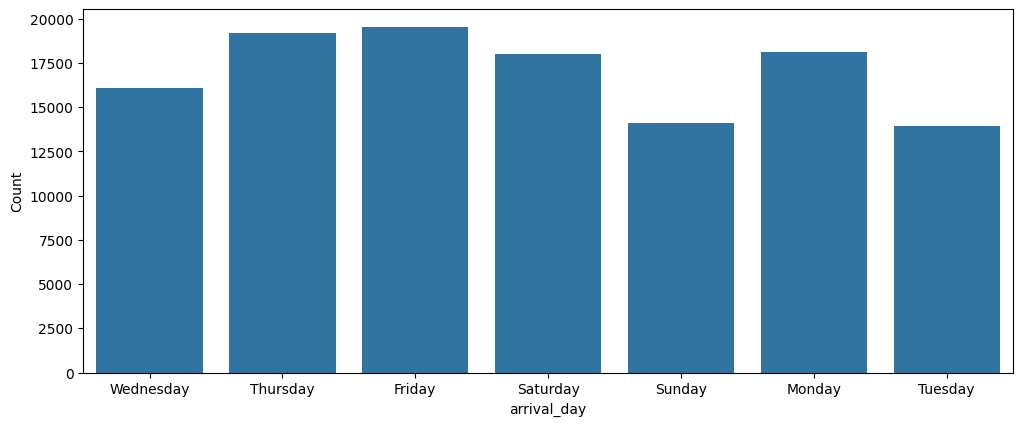

In [64]:
plt.figure(figsize=(12, 50))

plt.subplot(9, 1, 1)
sns.countplot(data=df, x='arrival_day')
plt.xlabel('arrival_day')
plt.ylabel('Count')

## Bivariate Analysis

### Hotel Type and Cancellation


In [65]:
pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index')

# We can see that the city hotels booking are more likely to be cancelled compared to the resort hotel, we can assume
# this is happening because as the booking increases the number of booking cancellation will also increase, so this is
# correlated postively

is_canceled,0,1
hotel,,
City Hotel,0.582032,0.417968
Resort Hotel,0.722319,0.277681


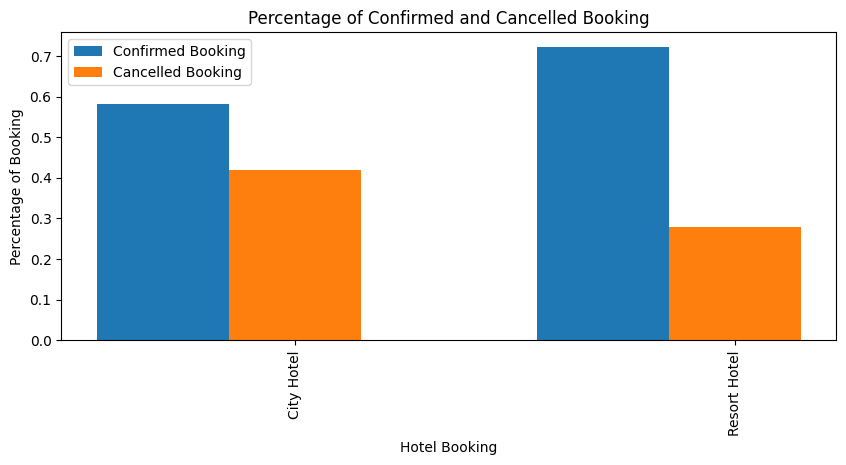

In [66]:
step = np.arange(0,2)
hotel_canceled =  pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (10, 4))

ax.bar(step - 0.3, hotel_canceled[0], width = 0.3)
ax.bar(step, hotel_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(hotel_canceled.index, rotation=90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Hotel Booking')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Lead time and Cancellation


In [67]:
pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

# Here if the lead time is longer it results to higher chances of cancellation, for the following analysis we have
# grouped the lead time into month i,e assuming 1 month has 30 days
# From the following crosstab below we see that leadtime in general has a linear effect towards cancellation ,that
# means if the longer lead time is high the cancellation rate ia also high compared to the shorter one, bookings that
# has more than 7 months lead time are more likely to be canceled.

is_canceled,0,1
lead_time_month,,
0,0.817498,0.182502
1,0.636173,0.363827
2,0.602189,0.397811
3,0.558978,0.441022
4,0.563510,0.436490
5,0.538081,0.461919
6,0.551851,0.448149
7,0.531465,0.468535
8,0.448830,0.551170


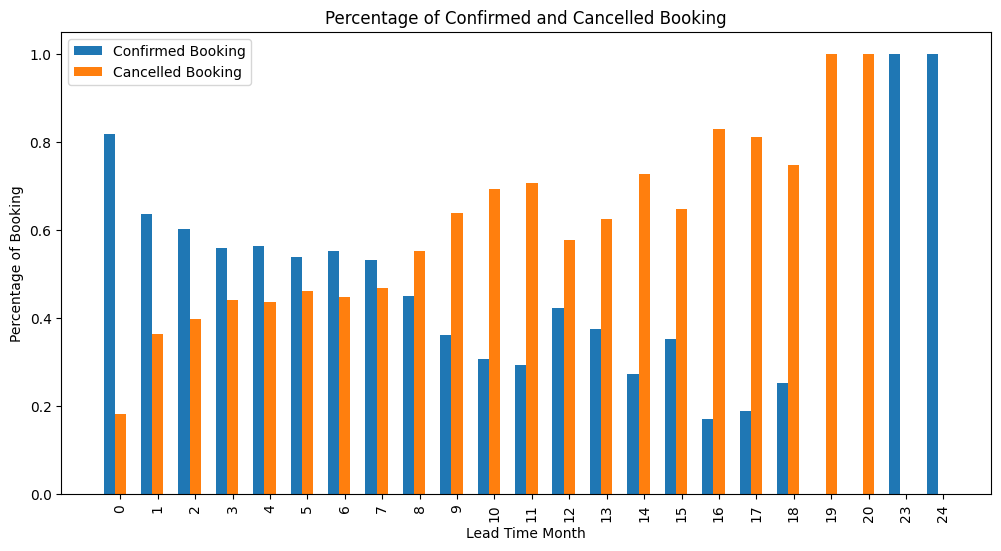

In [76]:
step = np.arange(0,23)
lead_time_canceled =  pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, lead_time_canceled[0], width = 0.3)
ax.bar(step, lead_time_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(lead_time_canceled.index.astype(str), rotation=90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Lead Time Month')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Arrival Date year and Cancellation

In [77]:
pd.crosstab(df['arrival_date_year'], df['is_canceled'], normalize = 'index')

# Here the cancellation rate goes down about 1.3% in 2015 compared to 2016, however the cancellation
# rate goes up 2.9% in 2017 compared to 2016 and the cancellations rates are similar to industry standard
# reports that there are 40 % of cancellation of bookings.

is_canceled,0,1
arrival_date_year,,
2015,0.629373,0.370627
2016,0.641004,0.358996
2017,0.612807,0.387193


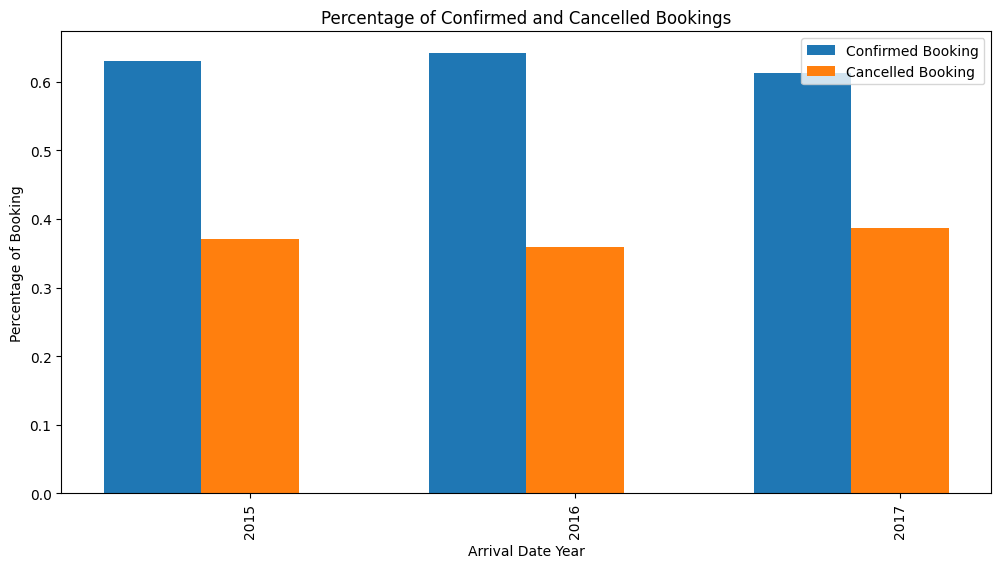

In [78]:
step = np.arange(0, 3)
arrival_date_year_canceled = pd.crosstab(df['arrival_date_year'], df['is_canceled'], normalize='index')
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plots
ax.bar(step - 0.3, arrival_date_year_canceled[0], width=0.3, label='Confirmed Booking')
ax.bar(step, arrival_date_year_canceled[1], width=0.3, label='Cancelled Booking')
ax.set_xticks(step)
ax.set_xticklabels(arrival_date_year_canceled.index, rotation=90)

# Labels and title
plt.xlabel('Arrival Date Year')
plt.ylabel('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Bookings')
plt.legend()
plt.show()


### Arrival Date Month and Cancellation

In [79]:
pd.crosstab(df['arrival_date_month'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# There is definitely a fluctuation in term of arrival month and cancellation were the highest cancellation months are:
# June with (41.5%), April with (40.8%) and May with (39.6%).
# Those months were summer months according to Portugal given data, plus june is a holiday month in portugal, that
# might be one of the reason why on these months cancelation is higher compared to the other months.

is_canceled,0,1
arrival_date_month,,
June,0.584959,0.415041
April,0.592114,0.407886
May,0.603111,0.396889
September,0.608352,0.391648
October,0.618722,0.381278
August,0.622098,0.377902
July,0.625169,0.374831
December,0.649792,0.350208
February,0.665546,0.334454


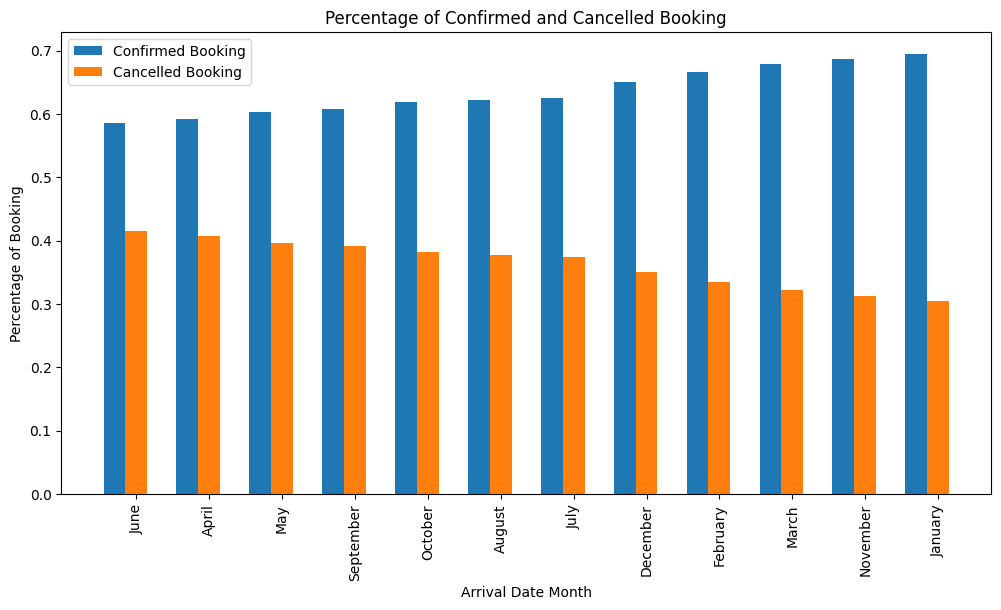

In [80]:
step = np.arange(0,12)
arrival_date_month_canceled = pd.crosstab(df['arrival_date_month'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(step - 0.3, arrival_date_month_canceled[0], width = 0.3)
ax.bar(step, arrival_date_month_canceled[1], width = 0.3)

# X-axis settings
ax.set_xticks(step)
ax.set_xticklabels(arrival_date_month_canceled.index, rotation=90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Arrival Date Month')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Number of Adults and Cancelation


In [81]:
pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# We can see below it shows that booking with more than 4 adults who were registered has always been cancelled.

is_canceled,0,1
adults,,
5,0.000000,1.000000
26,0.000000,1.000000
20,0.000000,1.000000
10,0.000000,1.000000
6,0.000000,1.000000
27,0.000000,1.000000
40,0.000000,1.000000
50,0.000000,1.000000
55,0.000000,1.000000


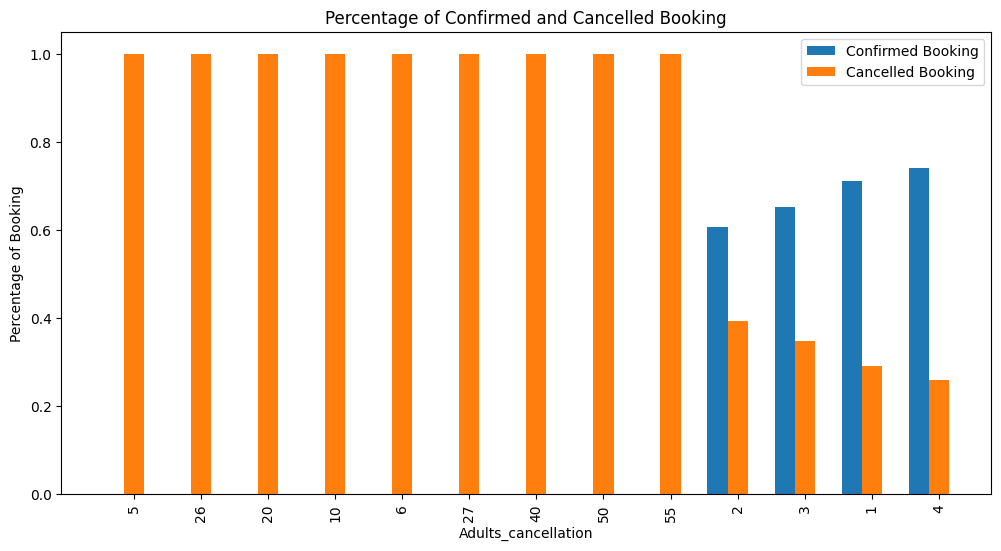

In [85]:
step = np.arange(0,13)
adults_canceled = pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, adults_canceled[0], width = 0.3)
ax.bar(step, adults_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(adults_canceled.index.astype(str), rotation=90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Adults_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Number of kids and Cancelation

In [86]:
pd.crosstab(df['kids'], df['is_canceled'], normalize = 'index')

# It seems to be no correlation between kids and towards the cancellation

is_canceled,0,1
kids,,
0.0,0.627407,0.372593
1.0,0.691841,0.308159
2.0,0.587609,0.412391
3.0,0.731959,0.268041
9.0,1.000000,0.000000
10.0,0.500000,0.500000


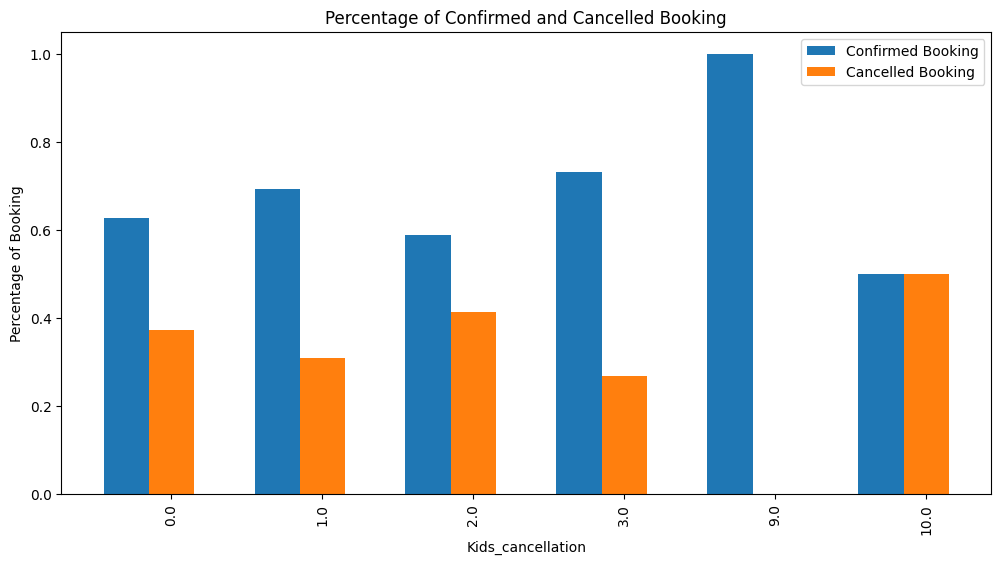

In [89]:
step = np.arange(0,6)
kids_canceled = pd.crosstab(df['kids'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, kids_canceled[0], width = 0.3)
ax.bar(step, kids_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticks(step)
ax.set_xticklabels(kids_canceled.index.astype(str), rotation=90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Kids_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Number of guest and Cancelation


In [90]:
pd.crosstab(df['guests'], df['is_canceled'], normalize = 'index')

# In guests columns it is almost similar to the adults columns, more than 5 guests who registered were always cancelled.

is_canceled,0,1
guests,,
1.0,0.709660,0.290340
2.0,0.603013,0.396987
3.0,0.678180,0.321820
4.0,0.581064,0.418936
5.0,0.751825,0.248175
6.0,0.000000,1.000000
10.0,0.500000,0.500000
12.0,0.500000,0.500000
20.0,0.000000,1.000000


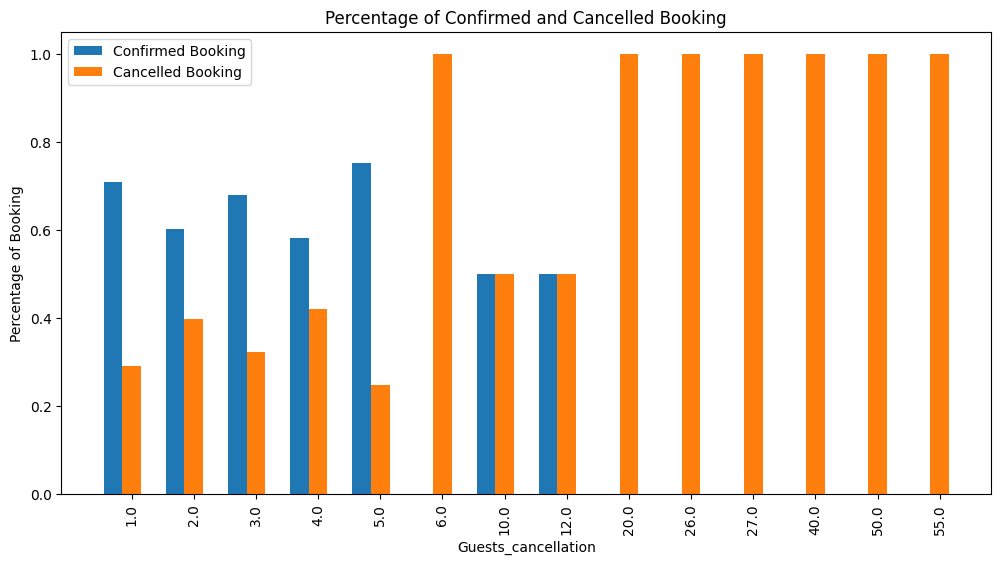

In [95]:
step = np.arange(0,14)
guests_canceled = pd.crosstab(df['guests'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, guests_canceled[0], width = 0.3)
ax.bar(step, guests_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(guests_canceled.index.)astype(str,rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Guests_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Meal and Cancelation

In [96]:
pd.crosstab(df['meal'], df['is_canceled'], normalize = 'index')

# Booking with full board(FB) meal which includes breakfast, lunch, dinner are more likely to cancel compared with
# other meal package.

is_canceled,0,1
meal,,
BB,0.625932,0.374068
FB,0.401003,0.598997
HB,0.655251,0.344749
SC,0.638754,0.361246


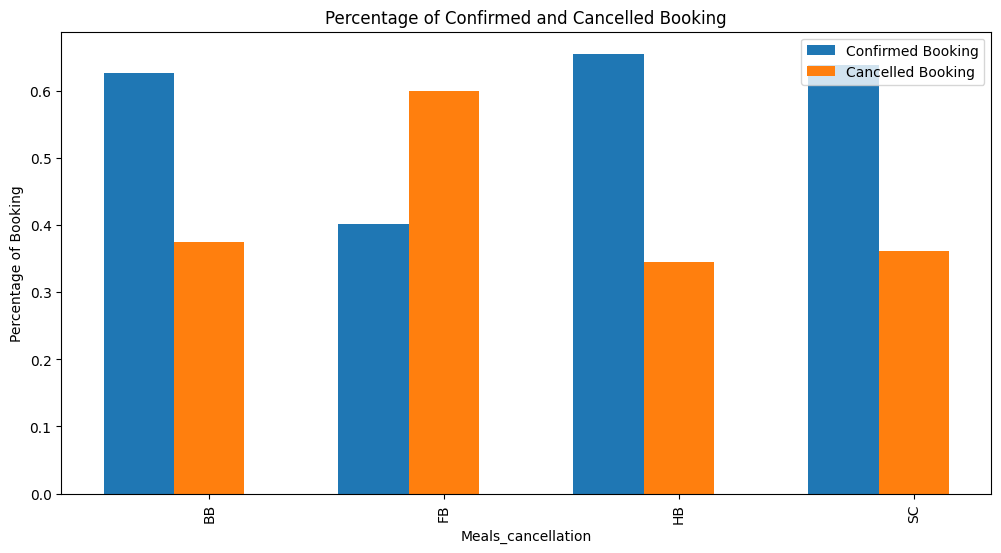

In [98]:
step = np.arange(0,4)
meals_canceled = pd.crosstab(df['meal'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, meals_canceled[0], width = 0.3)
ax.bar(step, meals_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(meals_canceled.index.astype(str), rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Meals_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Booking Country and Cancellation

In [99]:
pd.crosstab(df['booking_country'], df['is_canceled'], normalize = 'index')

# Both of the hotels were in portugal, so we have seen that the booking made within portugal has high cancellation
# compared to the outside of portugal location.

is_canceled,0,1
booking_country,,
Non_Portugal,0.763601,0.236399
Portugal,0.436801,0.563199


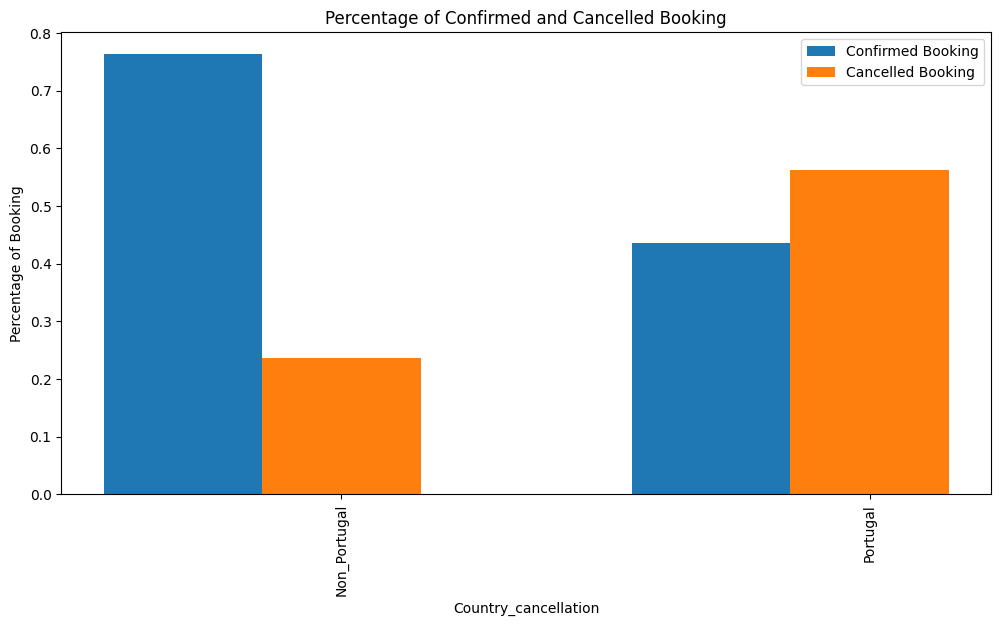

In [100]:
step = np.arange(0,2)
country_canceled = pd.crosstab(df['booking_country'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, country_canceled[0], width = 0.3)
ax.bar(step, country_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(country_canceled.index.astype(str), rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Country_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Market Segment and Cancellation

In [101]:
pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

# We can see that the group market segment has a higher cancelation, next is TA(online) and TA/TO(offline)
# has almost a similar number in term of cancellation rate and the lowest cancellation rate is direct booking
# we can exclude complimentary since it's a complimentary obviously the cancelation rate will be low.

is_canceled,0,1
market_segment,,
Aviation,0.778723,0.221277
Complementary,0.878453,0.121547
Corporate,0.812382,0.187618
Direct,0.846491,0.153509
Groups,0.388883,0.611117
Offline TA/TO,0.656713,0.343287
Online TA,0.632499,0.367501


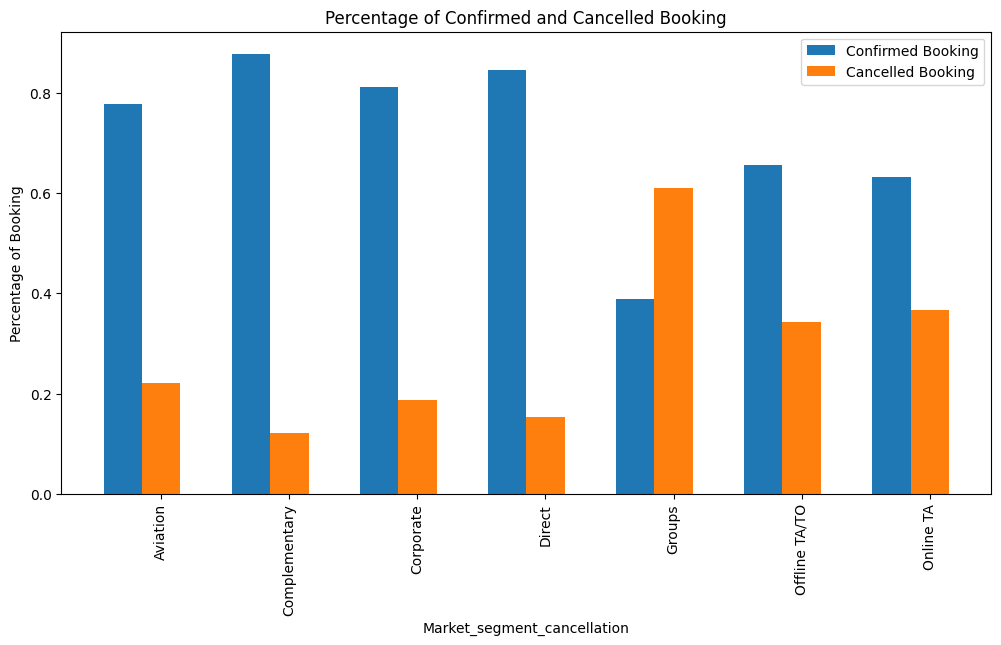

In [102]:
step = np.arange(0,7)
market_segment_canceled = pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, market_segment_canceled[0], width = 0.3)
ax.bar(step, market_segment_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(market_segment_canceled.index.astype(str),rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Market_segment_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Distribution Channel and Cancellation

In [103]:
pd.crosstab(df['distribution_channel'], df['is_canceled'], normalize = 'index')

# Here TA/TO has the highest cancellation rate among all the distribution channel while direct has
# the lowest cancellation rate followed by GDS

is_canceled,0,1
distribution_channel,,
Corporate,0.779432,0.220568
Direct,0.825273,0.174727
GDS,0.808290,0.191710
TA/TO,0.589367,0.410633


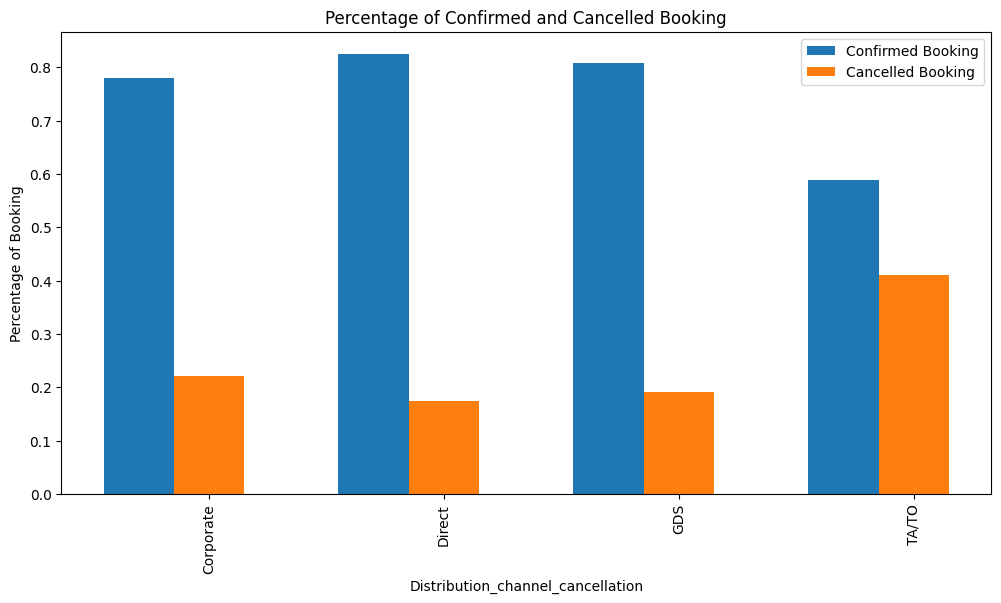

In [104]:
step = np.arange(0,4)
distribution_channel_canceled = pd.crosstab(df['distribution_channel'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, distribution_channel_canceled[0], width = 0.3)
ax.bar(step, distribution_channel_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(distribution_channel_canceled.index.astype(str),rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Distribution_channel_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Repeated Guest and Cancellation

In [105]:
pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize = 'index')

# Here the Repeated Guest are more likely to confirm their booking compared to non repeated guest

is_canceled,0,1
is_repeated_guest,,
0,0.621945,0.378055
1,0.853451,0.146549


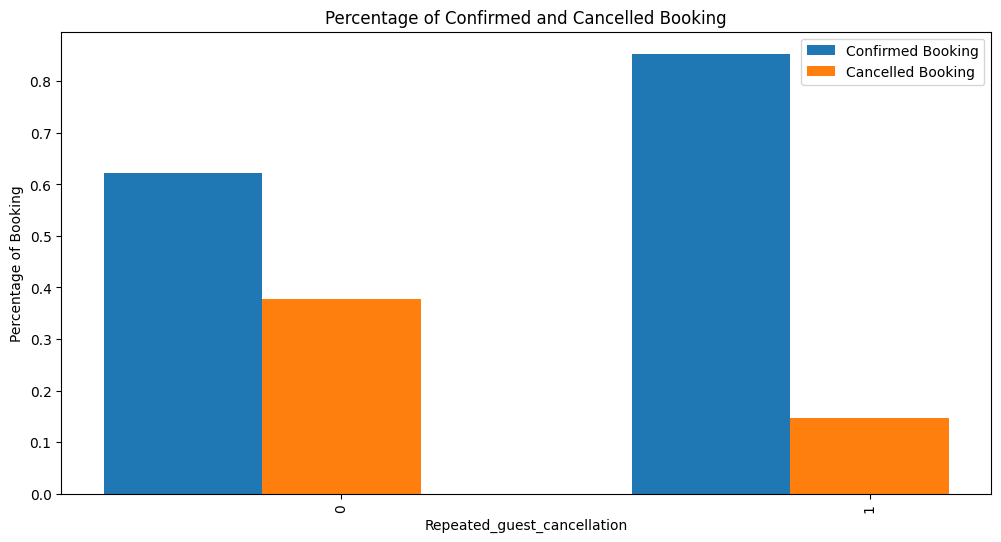

In [106]:
step = np.arange(0,2)
repeated_guest_canceled = pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, repeated_guest_canceled[0], width = 0.3)
ax.bar(step, repeated_guest_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(repeated_guest_canceled.index.astype(str),rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Repeated_guest_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Previosly Cancelled and Cancellation

In [107]:
pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')

# Booking that has been cancelled previously were likely to cancel again and from the below data
# 92% have cancelled again who has cancelled previously.

is_canceled,0,1
is_previously_cancelled,,
0,0.660682,0.339318
1,0.083218,0.916782


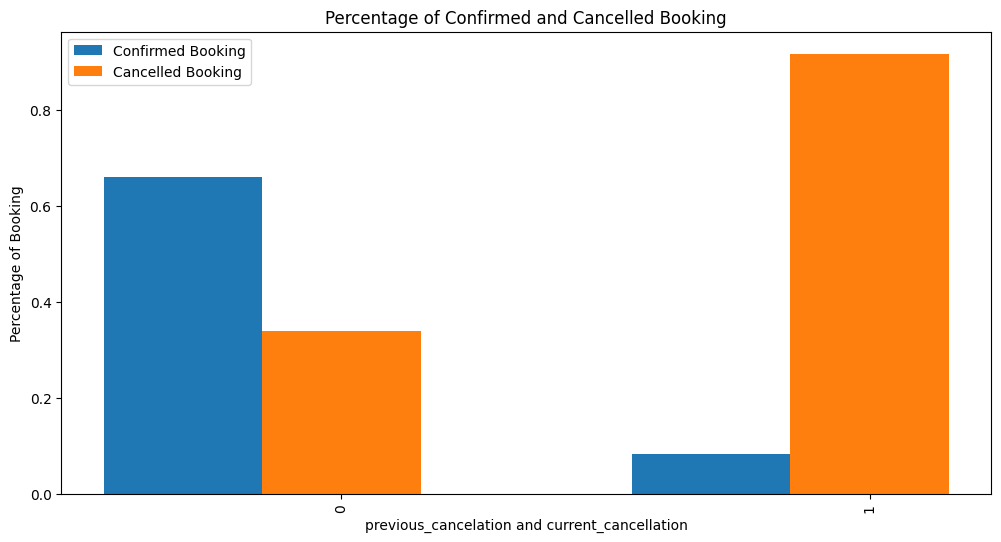

In [108]:
step = np.arange(0,2)
previous_cancelation_canceled = pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, previous_cancelation_canceled[0], width = 0.3)
ax.bar(step, previous_cancelation_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(previous_cancelation_canceled.index.astype(str), rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('previous_cancelation and current_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Booking Changes and Cancellation

In [109]:
pd.crosstab(df['is_booking_changes'], df['is_canceled'], normalize = 'index')

# Booking that has changes are less likely to be cancelled compared to the booking that never
# changed i,e original booking.

is_canceled,0,1
is_booking_changes,,
0,0.591376,0.408624
1,0.842848,0.157152


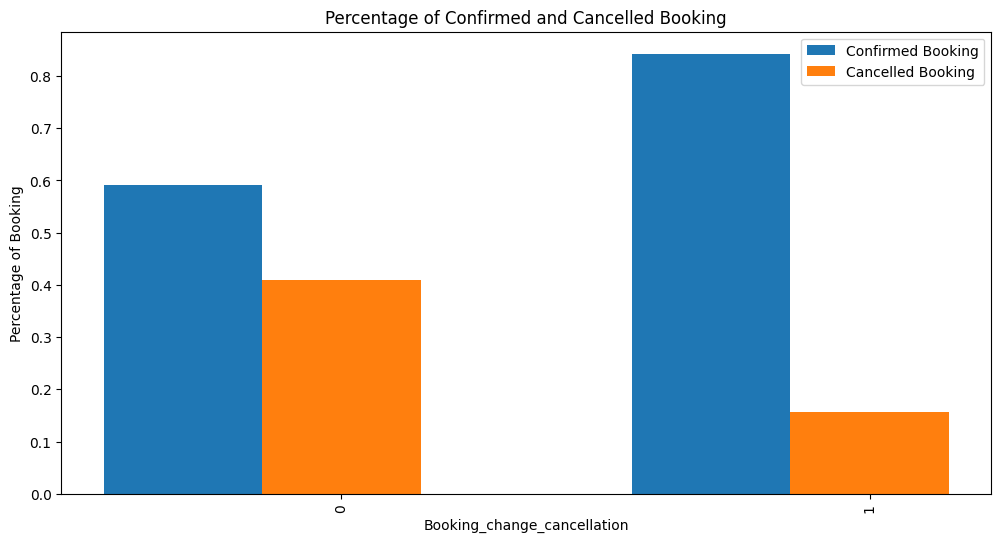

In [110]:
step = np.arange(0,2)
booking_change_canceled = pd.crosstab(df['is_booking_changes'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, booking_change_canceled[0], width = 0.3)
ax.bar(step, booking_change_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(booking_change_canceled.index.astype(str), rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Booking_change_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Deposit Type and Cancellation

In [111]:
pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')

# We can see that Non refund deposit has the highest cancellation rate among all deposit type by this we can assume
# that hotel somehow has protected themselves from loosing out of revenue.
# we have to look deeper, why does Non Refund policy have the highest cancellation rate among all the bookings.

is_canceled,0,1
deposit_type,,
No Deposit,0.716176,0.283824
Non Refund,0.006376,0.993624
Refundable,0.777778,0.222222


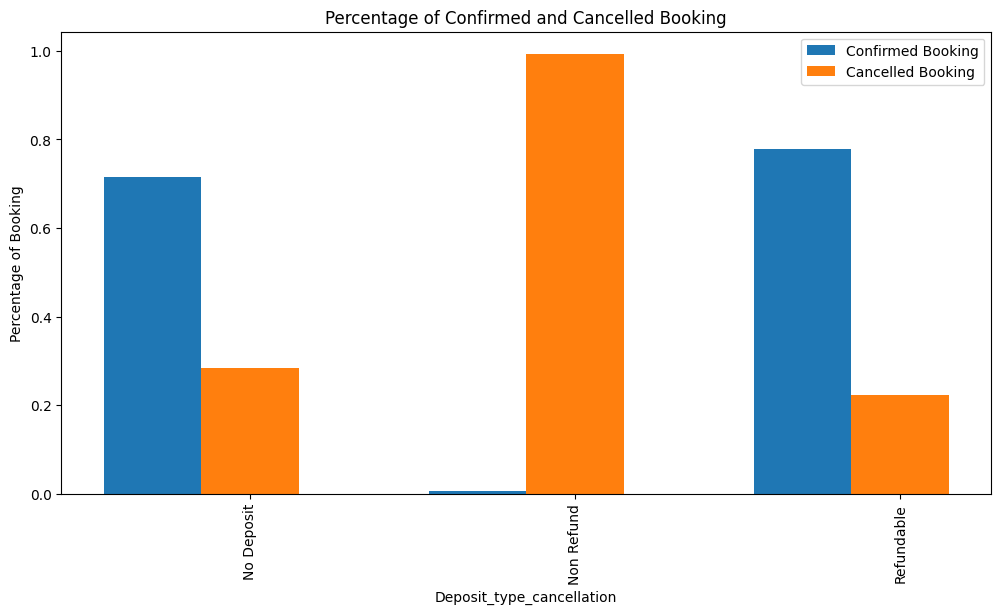

In [112]:
step = np.arange(0,3)
deposit_type_canceled = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, deposit_type_canceled[0], width = 0.3)
ax.bar(step, deposit_type_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(deposit_type_canceled.index.astype(str), rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Deposit_type_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Special Request and Cancellation

In [113]:
pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index')

# Here the total special request has a negative correlation with cancellation we see that the higher the number
# of special request lower the cancellation rate, so the customers who booked and requested a lot of requests are
# less likely to cancel.

is_canceled,0,1
total_of_special_requests,,
0,0.522308,0.477692
1,0.779810,0.220190
2,0.779335,0.220665
3,0.822177,0.177823
4,0.893491,0.106509
5,0.950000,0.050000


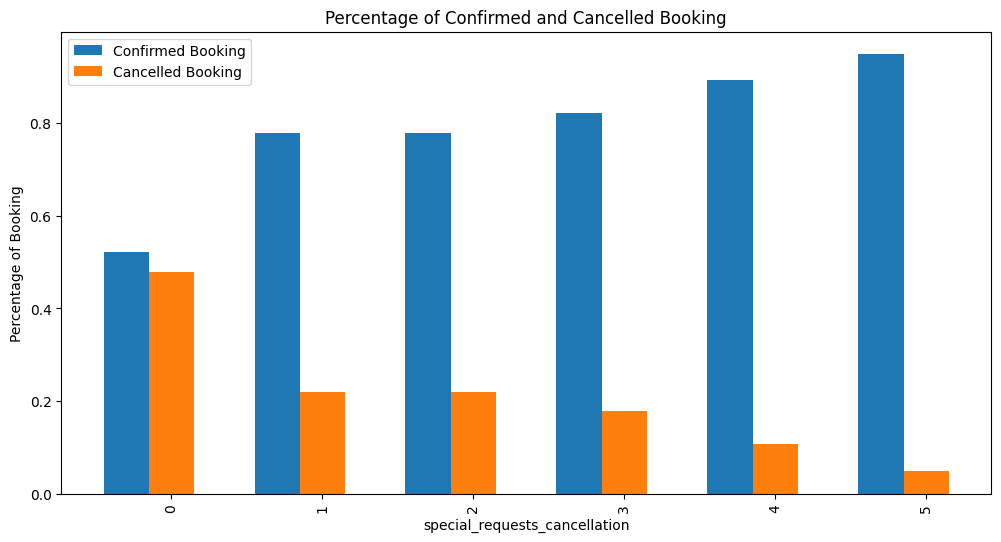

In [114]:
step = np.arange(0,6)
special_requests_canceled = pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, special_requests_canceled[0], width = 0.3)
ax.bar(step, special_requests_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(special_requests_canceled.index.astype(str), rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('special_requests_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

### Parking space and Cancellation

In [115]:
pd.crosstab(df['parking_space'], df['is_canceled'], normalize = 'index')

# Here it shows that customer who need a parking spot for their vehicle has never cancelled their hotel booking.
# since there is no cancellation for people who drives they can give a few free services like vallet parking and
# free charging by promoting such services.

is_canceled,0,1
parking_space,,
0,0.604635,0.395365
1,1.000000,0.000000


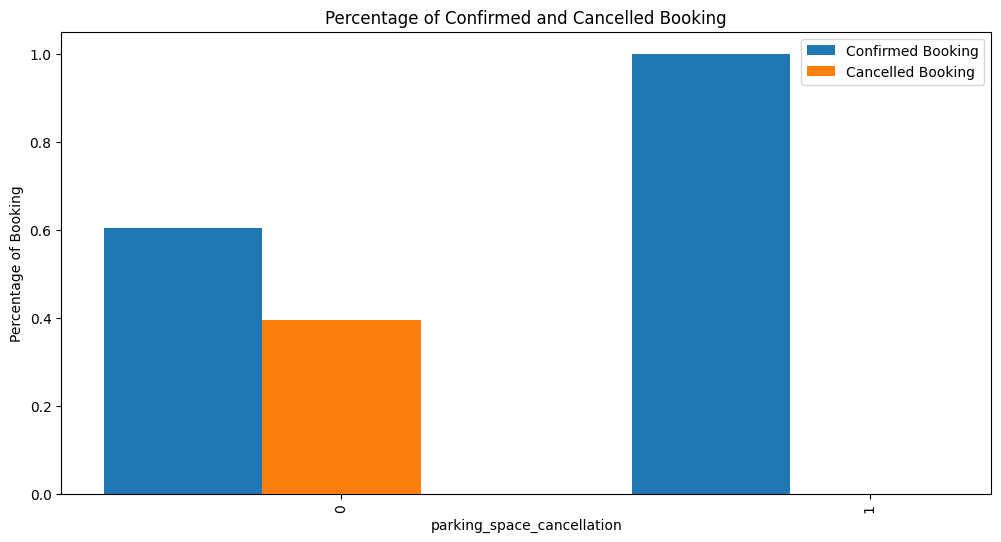

In [116]:
step = np.arange(0,2)
parking_space_canceled = pd.crosstab(df['parking_space'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step - 0.3, parking_space_canceled[0], width = 0.3)
ax.bar(step, parking_space_canceled[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(parking_space_canceled.index.astype(str), rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('parking_space_cancellation')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

## Multivariate Analysis

We have looked at comparison at each independent variable to dependent variable, we want to compare multiple independet varibale to dedpendent variable or independet variable to another independet variable

In [117]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,stays,guests,kids,lead_time_month,booking_country,is_previously_cancelled,is_booking_changes,parking_space
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Portugal,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Portugal,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Non_Portugal,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,Non_Portugal,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,Non_Portugal,0,0,0


### Hotel type , lead time and cancellation

In [118]:
pd.crosstab(df['hotel'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')

# From here we can conclude that the median lead time of cancelled booking in both hotel are
# longer compared to confirmed booking the median lead time for cancelled booking in both hotel are more than
# 3 months while for confirmed booking it's close to 1 month

is_canceled,0,1
hotel,,
City Hotel,50.0,115.0
Resort Hotel,38.0,109.0


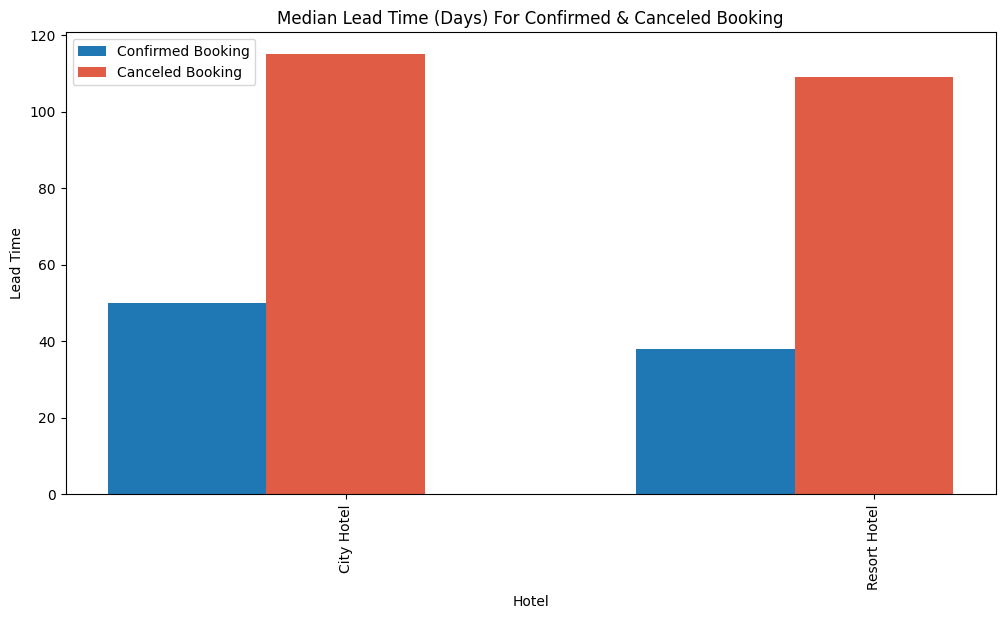

In [120]:
lead_time_booking =  pd.crosstab(df['hotel'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')

step2 = np.arange(0,2)

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(step2 - 0.3, lead_time_booking[0], width = 0.3)
ax.bar(step2, lead_time_booking[1], width = 0.3, color = '#E05C45')
ax.set_xticks(step2)
ax.set_xticklabels(lead_time_booking.index, rotation = 90)
plt.xlabel('Hotel')
plt.ylabel('Lead Time')
plt.title('Median Lead Time (Days) For Confirmed & Canceled Booking')
plt.legend(['Confirmed Booking', 'Canceled Booking'])
plt.show()

### Hotel type , arrival_date_year and cancellation

In [121]:
pd.crosstab([df['hotel'],df['arrival_date_year']], df['is_canceled'], normalize = 'index')

# From here we can conclude that the Cancellations in City Hotel was bit high compared to the Redort hotel.

is_canceled                            0         1
hotel        arrival_date_year                    
City Hotel   2015               0.560361  0.439639
             2016               0.595205  0.404795
             2017               0.574590  0.425410
Resort Hotel 2015               0.742689  0.257311
             2016               0.734540  0.265460
             2017               0.692249  0.307751

### Hotel type , meal and cancellation

In [122]:
pd.crosstab([df['hotel'],df['meal']], df['is_canceled'], normalize = 'index')

# Resort hotel has higher confirmed booking in any meal category, compared to city hotel, while Full board
# meal package seems to be the meal package with the highest cancellation rate in both hotel

is_canceled               0         1
hotel        meal                    
City Hotel   BB    0.571433  0.428567
             FB    0.204545  0.795455
             HB    0.619850  0.380150
             SC    0.623245  0.376755
Resort Hotel BB    0.738584  0.261416
             FB    0.412467  0.587533
             HB    0.683445  0.316555
             SC    0.769293  0.230707

### Hotel type , adr and cancellation

In [123]:
pd.crosstab(df['hotel'], df['is_canceled'], values = df['adr'], aggfunc = 'median')

# For city hotel wee see that the median adr for cancelled and confirmed booking is same while for resort hotel
# the median adr for cancelled booking is slightly higher compared to confirmed booking.

is_canceled,0,1
hotel,,
City Hotel,100.0,99.9
Resort Hotel,72.0,84.0


### Hotel type , deposit_type and cancellation

In [124]:
pd.crosstab([df['hotel'],df['deposit_type']], df['is_canceled'], normalize = 'index')

# From the below we can see that irrrespective of the hotel the cancellations for Non Refund is higher.

is_canceled                       0         1
hotel        deposit_type                    
City Hotel   No Deposit    0.695134  0.304866
             Non Refund    0.001865  0.998135
             Refundable    0.300000  0.700000
Resort Hotel No Deposit    0.752573  0.247427
             Non Refund    0.040140  0.959860
             Refundable    0.845070  0.154930

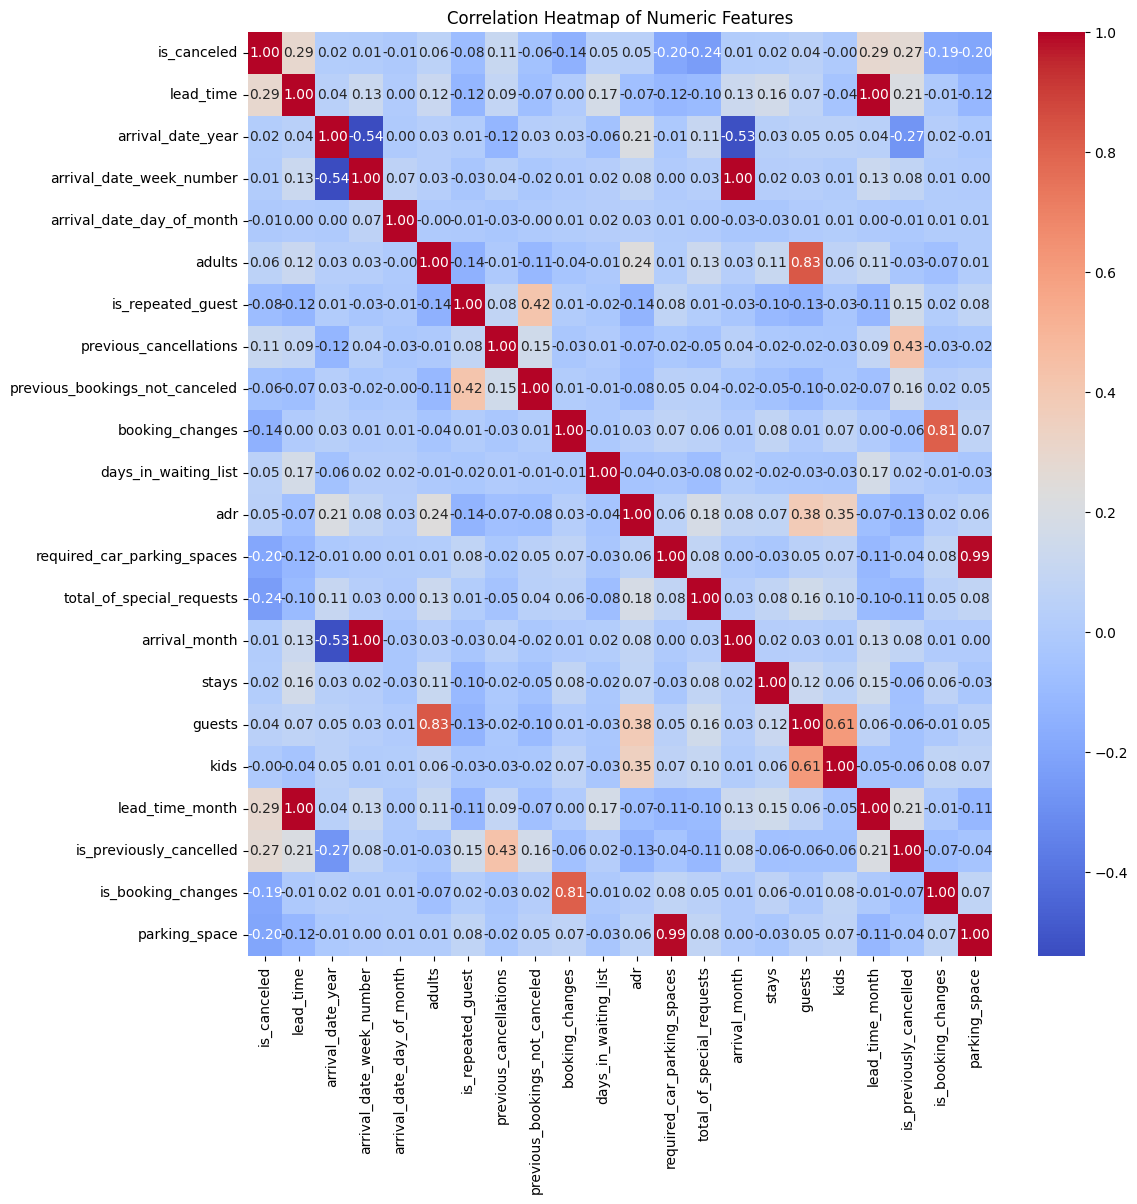

In [133]:
# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## Further Investigation for Business

### Deposit type and Lead time

In [134]:
pd.crosstab(df['deposit_type'], 'Median Lead Time', values = df['lead_time'], aggfunc = 'median')

# The reason why non refund has the highest cancellation because of the longer lead time. before also we
# have seen that the longer the lead time the higher the chances of cancellation happening.

col_0,Median Lead Time
deposit_type,
No Deposit,56.0
Non Refund,183.0
Refundable,169.0


### Booking country , Market Segment and cancellation rate

In [135]:
pd.crosstab([df['booking_country'],df['market_segment']], df['is_canceled'], normalize = 'index')

is_canceled                            0         1
booking_country market_segment                    
Non_Portugal    Aviation        0.916667  0.083333
                Complementary   0.985294  0.014706
                Corporate       0.980000  0.020000
                Direct          0.891949  0.108051
                Groups          0.928366  0.071634
                Offline TA/TO   0.987089  0.012911
                Online TA       0.655408  0.344592
Portugal        Aviation        0.601942  0.398058
                Complementary   0.867378  0.132622
                Corporate       0.773237  0.226763
                Direct          0.796556  0.203444
                Groups          0.159453  0.840547
                Offline TA/TO   0.322433  0.677567
                Online TA       0.547994  0.452006

### Booking country , Market Segment and Previous cancellation rate

In [136]:
pd.crosstab([df['booking_country'],df['market_segment']], df['is_previously_cancelled'], normalize = 'index')

is_previously_cancelled                0         1
booking_country market_segment                    
Non_Portugal    Aviation        0.962121  0.037879
                Complementary   0.985294  0.014706
                Corporate       0.983000  0.017000
                Direct          0.997717  0.002283
                Groups          0.962574  0.037426
                Offline TA/TO   0.999836  0.000164
                Online TA       0.999548  0.000452
Portugal        Aviation        0.961165  0.038835
                Complementary   0.900915  0.099085
                Corporate       0.869454  0.130546
                Direct          0.971414  0.028586
                Groups          0.774793  0.225207
                Offline TA/TO   0.860792  0.139208
                Online TA       0.950213  0.049787

In [137]:
df.to_csv('hotel_booking_Model_data.csv' ,index= False)

# Business Questions:

## - How Market Segment Of Booking Affecting Cancellation ?

### Market Segment & Booking Cancellation

* From our analysis we see that Group has the highest cancellation rate around 61 %
* Travel Agent (Online / Offline) has a cancellation rate around 34 - 36 %
* Aviation, Corporate and Direct has a cancellation rate around 1% - 22 % of their booking

Based on this we can conclude that group booking are the market segment that is most likely to be cancelled segment while Direct has the lowest cancellation rate at 15%, "Aside Complimentary"

## - How’s a lead time of a booking affecting cancellation ?

### Lead Time & Cancellation Rate

* Here we group the lead time into 30 days month to make it more generalize to analyze comparing it with a specific number of days
* Cancellation is positively correlated with lead time, higher the lead time higher the cancellation rate and lower the lead time lower the  cancellation.

Here we're comparing each month lead time with the cancellation rate.
1. Booking That has 0 - 7 months lead time have a higher confirmed booking rate i,e greater than 50%
2. Booking that has more than 7 months lead time have a higher cancelation rate i,e greater than 50%


## - How’s different deposit type affecting cancellation of a booking ?


### Deposit Type & Cancellation Rate

This Dataset consists of a 3 diffrent deposit type i,e NO Deposit, NO Refund, and Refundable:
1. No Refund Booking has the highest cancellation rate at 99.4%
2. No Deposit has cancellation rate of 28.3 %
3. While Refundable has cancellation rate around 22%

From the hotel perspective view there is no loss for them because they don't loose revenue when no refund booking is cancelled, but why does non refundable booking are most likely to be cancelled? wouldn't it be  wasting money cancelling the non refundable booking.
* For this we can look the median lead time for each Deposit type, mean we cannot consider because it is proned to outliers.
1. Median Lead Time Non Refund 183 Days
2. Median Lead Time Refundable 169 Days
3. Median Lead Time No Deposit 56 Days

* Looking at the median lead time it shows that No Deposit booking is the highest compared to the other booking and based on our analysis on lead time and cancellation it shows that higher the lead time high the cancellation compared to the lower one this is definitely one of the reason why cancellation rate is high in No Refund Deposit.

## - How does cancellation rate of booking from portugal and booking that’s made outside portugal ?

### Booking Country & Cancellation Rate

For booking location we have 177 countries including Portugal, it's not easy to aggregate every country with portugal in one split, so we have splitted this into 2 i,e Portugal (Booking that is from Portugal) and Non_Portugal (Booking rest from the Portugal)
1. Non_Portugal booking have 24% cancellation Rate
2. Portugal booking have 56% cancellation Rate

Why do Portugal booking are more likely to be cancelled compared to Non_Portugal booking.
* For this we can look into Booking country column with respective to the market segment column like how the Cancellation has been with the is_ canceled column and the Pis_previously_cancelled column.
1. For Non_Portugal with respective to the Market segment column comapared to the cancellation rate column here the cancellation rate is less that 12% but from Online TA market the cancellation rate was close to 35%.  
2. For Portugal with respective to the Market segment column comapared to the cancellation rate column here the cancellation rate is more that 50% and from groups market the cancellation rate was much higher close to 85%.
3. For Non_Portugal with respective to the Market segment column comapared to the is previously cancelled column here the previously cancellation rate is less that 2%
4. For Portugal with respective to the Market segment column comapared to the is previously cancelled column here the previously cancellation rate is more that 2% and from groups market the cancellation rate was close to 25%.

## - What Are The Other Factors that affecting cancellation of booking ?

## Repeated Guests & Cancellation rate

* Repeated Guest has cancellation rate of around 14%
* Non Repeated Guest have cancellation rate of 38% which is almost double the booking compared to repeated guest

So we can conclude that Repeated Guest are more likely to confirm their booking compared to non repeated guest.

## Previous Cancellation & Cancellation rate

1. Booking who have previouly cancelled has the cancellation rate of 92%.
2. Booking who have not cancelled previouly has the cancellation rate of 34%

So we can conclude that People who have not cancelled previosly are more likely to confirm their booking compared to the people who have cancelled previously.

### Booking Changes & Cancellation rate

1. Customer who made booking Changes to their booking have a lower cancellation rate of 16%
2. Customer who never made booking Changes to their booking have a higher cancellation rate of 40%

So we can conclude that People who made booking Changes are more likely to confirm their booking compared to the people never made booking Changes.

### Special Request & Cancellation rate

1. The cancellation rate of booking that has a 5 special requests have the lowest cancellation rate of 22 %.
2. While Booking with no special request has cancellation rate of 48%

The number of special requests in booking apperently affecting the cancellation rate of a booking, we see that booking who has no special request are more likely to be cancelled compared to booking that has a special request.